In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

# data set https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

In [164]:
conda install -c conda-forge tabulate 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [165]:
from tabulate import tabulate

In [166]:
raw = pd.read_excel("CCPP/Folds5x2_pp.xlsx")
df = pd.DataFrame(raw)

# Исследовательский анализ данных

In [167]:
raw.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [168]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


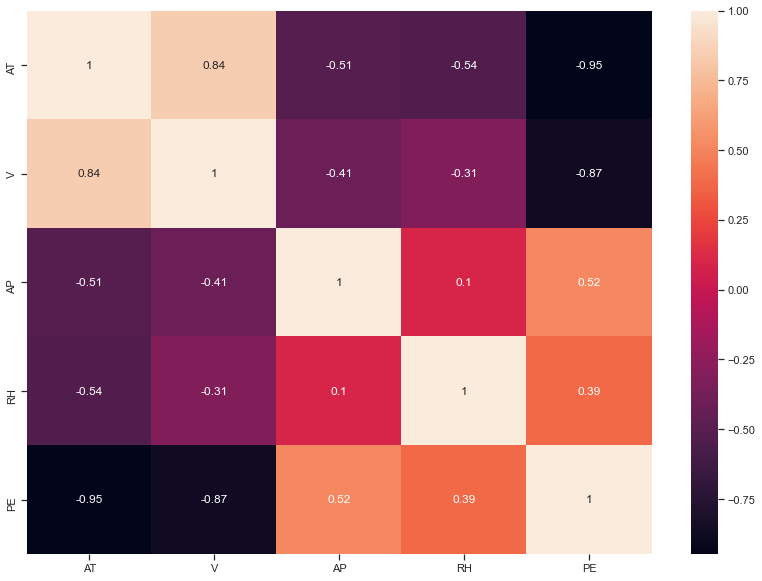

In [169]:
import seaborn as sns
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True)

Из корреляционной матрицы мы можем видеть, что AT и V имеют сильную отрицательную корреляцию с целевой переменной (PE), поскольку их коэффициенты корреляции составляют -0,95 и -0,87 соответственно. AP и RH имеют слабую положительную корреляцию с PE с коэффициентами корреляции 0,52 и 0,39. Мы можем визуализировать двумерное распределение набора данных (которое показывает, как каждая функция соотносится друг с другом и PE)

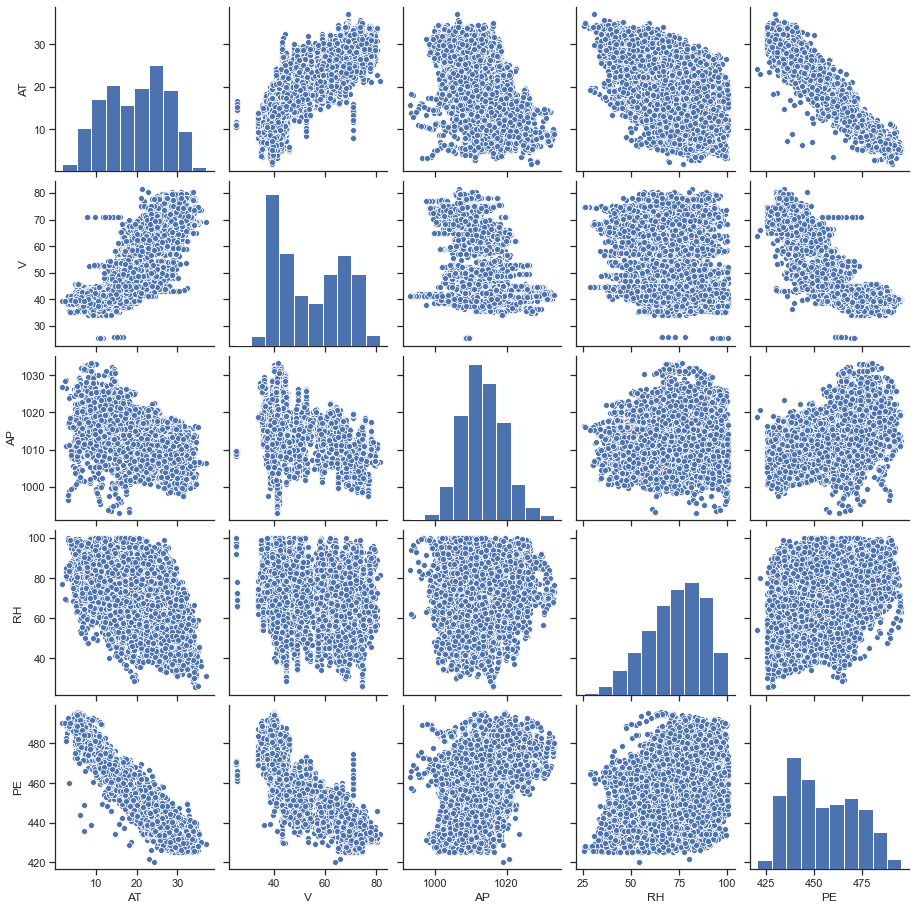

In [170]:
sns.set(style="ticks")
sns.pairplot(raw, diag_kind = "hist")

Теперь мы можем легко увидеть, что есть отрицательная корреляция, наблюдаемая на AT и V по отношению к PE.

# Develop the model

In [171]:
df_1 = df[["AT", "V"]]
df_2 = df[["AT", "V", "RH"]]
df_3 = df[["AT", "V", "AP", "RH"]]

y = df["PE"]

# Attribute Information:
Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

# Training the model

In [172]:
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

X1_train, X1_test, y1_train, y1_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

X2_train, X2_test, y2_train, y2_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

# Linear Regression

In [173]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train)
y1_pred = regressor1.predict(X1_test)

regressor2 = LinearRegression()
regressor2.fit(X2_train, y2_train)
y2_pred = regressor2.predict(X2_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)

r_squared = r2_score(y_test, y_pred)
r_squared1 = r2_score(y1_test, y1_pred)
r_squared2 = r2_score(y2_test, y2_pred)

mae = mean_absolute_error(y_test, y_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)

data = {'': ['rmse', 'mae', 'r2'],
        'model1': [rmse, mae, r_squared],
        'model2': [rmse1, mae1, r_squared1],
        'model3': [rmse2, mae2, r_squared2]
        }

dfLinear = pd.DataFrame(data)

print(dfLinear.to_markdown())

|    |      |   model1 |   model2 |   model3 |
|---:|:-----|---------:|---------:|---------:|
|  0 | rmse | 4.84868  | 4.45024  | 4.44226  |
|  1 | mae  | 3.85455  | 3.5704   | 3.56656  |
|  2 | r2   | 0.919622 | 0.932289 | 0.932532 |


# Decision Tree Regression

In [174]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)
###
dt_regressor1 = DecisionTreeRegressor()
dt_regressor1.fit(X1_train, y1_train)

y_pred1 = dt_regressor1.predict(X1_test)
###
dt_regressor2 = DecisionTreeRegressor()
dt_regressor2.fit(X2_train, y2_train)

y2_pred = dt_regressor2.predict(X2_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)

r_squared = r2_score(y_test, y_pred)
r_squared1 = r2_score(y1_test, y1_pred)
r_squared2 = r2_score(y2_test, y2_pred)

mae = mean_absolute_error(y_test, y_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)

data = {'': ['rmse', 'mae', 'r2'],
        'model1': [rmse, mae, r_squared],
        'model2': [rmse1, mae1, r_squared1],
        'model3': [rmse2, mae2, r_squared2]
        }

dfTree = pd.DataFrame(data)

print (dfTree.to_markdown())

|    |      |   model1 |   model2 |   model3 |
|---:|:-----|---------:|---------:|---------:|
|  0 | rmse | 4.45465  | 4.45024  | 4.8492   |
|  1 | mae  | 3.1947   | 3.5704   | 3.15299  |
|  2 | r2   | 0.932155 | 0.932289 | 0.919604 |


# Random Forest Regression

In [175]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

###

rf_regressor1 = RandomForestRegressor()
rf_regressor1.fit(X1_train, y1_train)

y_pred1 = rf_regressor1.predict(X1_test)

###

rf_regressor2 = RandomForestRegressor()
rf_regressor2.fit(X2_train, y2_train)

y_pred2 = rf_regressor2.predict(X2_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)

r_squared = r2_score(y_test, y_pred)
r_squared1 = r2_score(y1_test, y1_pred)
r_squared2 = r2_score(y2_test, y2_pred)

mae = mean_absolute_error(y_test, y_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)

data = {'': ['rmse', 'mae', 'r2'],
        'model1': [rmse, mae, r_squared],
        'model2': [rmse1, mae1, r_squared1],
        'model3': [rmse2, mae2, r_squared2]
        }

dfForest = pd.DataFrame(data)

print(dfForest.to_markdown())

|    |      |   model1 |   model2 |   model3 |
|---:|:-----|---------:|---------:|---------:|
|  0 | rmse | 3.51403  | 4.45024  | 4.8492   |
|  1 | mae  | 2.621    | 3.5704   | 3.15299  |
|  2 | r2   | 0.957781 | 0.932289 | 0.919604 |


# Performance evaluation

In [176]:
print("# Linear Regression")
print(dfLinear.to_markdown())
print("\n # Decision Tree Regression")
print(dfTree.to_markdown())
print("\n # Random Forest Regression")
print(dfForest.to_markdown())

# Linear Regression
|    |      |   model1 |   model2 |   model3 |
|---:|:-----|---------:|---------:|---------:|
|  0 | rmse | 4.84868  | 4.45024  | 4.44226  |
|  1 | mae  | 3.85455  | 3.5704   | 3.56656  |
|  2 | r2   | 0.919622 | 0.932289 | 0.932532 |

 # Decision Tree Regression
|    |      |   model1 |   model2 |   model3 |
|---:|:-----|---------:|---------:|---------:|
|  0 | rmse | 4.45465  | 4.45024  | 4.8492   |
|  1 | mae  | 3.1947   | 3.5704   | 3.15299  |
|  2 | r2   | 0.932155 | 0.932289 | 0.919604 |

 # Random Forest Regression
|    |      |   model1 |   model2 |   model3 |
|---:|:-----|---------:|---------:|---------:|
|  0 | rmse | 3.51403  | 4.45024  | 4.8492   |
|  1 | mae  | 2.621    | 3.5704   | 3.15299  |
|  2 | r2   | 0.957781 | 0.932289 | 0.919604 |


- Root Mean Squared Error (RMSE): измеряет среднюю ошибку, выполняемую моделью при прогнозировании результата наблюдения.

- Mean Absolute Error: измеряет, насколько предсказанные значения отличаются от фактических значений. (Чем ниже значение MAE, тем лучше)

- R-Squared: означает, насколько вариативность целевой переменной может быть объяснена набором функций, используемых при обучении модели.

Теперь, когда мы оценили все наши модели, мы видим, что алгоритм Random Forest Regression с первой моделью дал нам наилучшую производительность. R2 равен 0,958 (что означает, что 95,8% вариации целевой переменной PE можно объяснить с помощью модели).
Точно так же он дает самое низкое среднеквадратичное значение 3,5.

# Comparison Between Linear & Lasso Regressions

In [177]:
raw = pd.read_excel("CCPP/Folds5x2_pp.xlsx")
X = raw[['AT', 'V', 'AP', 'RH']]
y = raw['PE']

linear = LinearRegression().fit(X, y)
linear.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

Из приведённых данных видно, что температура, вакуум на выхлопе паровой трубы и относительная влажность воздуха отрицательно влияют на выработку электроэнергии. В то время как атмосферное давление влияет положительно. Однако влияние данного параметра минимально в силу самого маленького коэффициента регрессии. Чуть сильнее (в 1,5 раза по модулю больше) влияет относительная влажность воздуха, ещё сильнее вакуум на выхлопе паровой трубы. Самое сильное негативное влияние оказывает температура (в 10 раз больше, чем следующий параметр - давление). Самое сильное влияние температуры логично вследствие наличия значительного количества не только природных, но и социальных факторов. Вместе с повышением температуры воздуха значительно снижаются затраты электроэнергии (наступают теплыё летние времена, увеличивается продолжительность светлого времени суток, когда люди могут использовать естественное освещение, снижаются затраты электроэнергии на отопление, снижается потребность приговлении согревающего питья, тяжёлой, наваристой пищи, часть людей стабильно готовят пищу на костре). Отметим, что в тёплое время года в среднем выше относительная влажность и ниже атмосферное давление. Однако, при одном и том же температурном режиме эти факторы значительно зависят от климатической зоны, высоты над уровнем моря и других аспектов. Поэтому они менее коррелированы с светлым временем года и, как следствие, оказывают меньшее негативное влияние на выработку электроэнергии.

In [178]:
X

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [179]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

ValueError: endog must be in the unit interval.

In [ ]:
linear_score = r2_score(y, linear.predict(X))
ridge = Ridge(alpha=100).fit(X, y)
ridge.coef_

In [ ]:
s = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(s + 0.00, linear.coef_, color = 'b', width = 0.25)
ax.bar(s + 0.25, ridge.coef_, color = 'g', width = 0.25)

In [ ]:
(ridge.coef_ - linear.coef_) / linear.coef_

В результате сравнения коэффициентов на основе приведённого графика и подсчёта относительных измений, видно, что относительные изменения коэффициентов в ridge-регрессии по сравнению с линейной незначительные (порядка  10−10 ). Отсюда можно сделать вывод, что модель ridge-регресии с параметром  𝜆=100  очень похожа на линейную.

In [ ]:
ridge_score = r2_score(y, ridge.predict(X))
ridge_score

In [ ]:
(ridge_score - linear_score) / linear_score

Относительные изменения  𝑅^2𝑠𝑐𝑜𝑟𝑒  имеют порядок  10−7 . Отсюда можно сделать вывод, что данный показатель не изменился, т.е. точность модели осталась прежней.

In [ ]:
data = pd.DataFrame(columns=['lambda', 'R', 'AT', 'V', 'AP', 'RH'])

t = 2**20
for i in range(40):
  ridge = Ridge(alpha=t).fit(X, y) 
  data.loc[i] = [t, r2_score(y, ridge.predict(X))] + list(ridge.coef_)
  t /= 2;

In [ ]:
data.sample(3)

In [ ]:
fig, ax = plt.subplots()
plt.plot(data['lambda'], data.AT, label='AT')
plt.plot(data['lambda'], data.V, label='V')
plt.plot(data['lambda'], data.AP, label='AP')
plt.plot(data['lambda'], data.RH, label='RH')
ax.set_xlabel('lambda')
ax.set_ylabel('coefficients')
ax.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(data.loc[data['lambda'] <= 128, 'lambda'], data.loc[data['lambda'] <= 128, 'R'])
ax.set_xlabel('lambda')
ax.set_ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10).fit(X, y)
lasso.coef_

In [ ]:
s = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(s + 0.00, linear.coef_, color = 'b', width = 0.25)
ax.bar(s + 0.25, lasso.coef_, color = 'g', width = 0.25)

In [ ]:
(lasso.coef_ - linear.coef_) / linear.coef_

При использовании lasso-регрессии с параметром регуляризации  10  изменения коэффициентов значительны по сравнению с линейной регрессией. Коэффициент, связывающий с температурой уменьшийлся практически на  30% , коэффициент при вакууме на выхлопе паровой трубы вырос на  79% , в то время как коэффициенты при атмосферном давлении и относительной влажности обнулились.

In [ ]:
lasso_score = r2_score(y, lasso.predict(X))
lasso_score

In [ ]:
(lasso_score - linear_score) / linear_score

𝑅^2𝑠𝑐𝑜𝑟𝑒  снизилась приблизительно на  2.2  в относительном измерении (в абсолютном выражении упала на  2  процентных пункта). Точность ухудшилась в связи с исключением признаков, хоть и мало коррелированных.

In [ ]:
data = pd.DataFrame(columns=['lambda', 'R', 'AT', 'V', 'AP', 'RH'])

t = 2**6
for i in range(80):
  lasso = Lasso(alpha=t).fit(X, y) 
  data.loc[i] = [t, r2_score(y, lasso.predict(X))] + list(lasso.coef_)
  t /= 1.1;
t

In [ ]:
data.sample(3)

In [ ]:
fig, ax = plt.subplots()
plt.plot(data['lambda'], data.AT, label='AT')
plt.plot(data['lambda'], data.V, label='V')
plt.plot(data['lambda'], data.AP, label='AP')
plt.plot(data['lambda'], data.RH, label='RH')
ax.set_xlabel('lambda')
ax.set_ylabel('coefficients')
ax.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(data['lambda'], data.R)
ax.set_xlabel('lambda')
ax.set_ylabel('R^2')
plt.show()

C ростом параметра регуляризации lasso-регресии все коэффцициенты по очереди зануляются. При параметре регуляризации  10 зануляются коэффициенты, отвечающие за атмосферное давление и относительную влажность, температура обнуляется при  50 . Таким образом, можно сделать вывод о том, что зависимость выработки электричества от атмосферного давления, относительной влажности и температуры имеет сезонный характер. Данные показатели, как правило, демонстрируют течение того или иного времени года, а значит, снижение/повышение потребления электричества и необходимой выработки для этого. Вакуум на выхлопе трубы в свою очередь непосредственно связан с процессом производства электричества, поэтому он и зануляется последним. Также отметим эксоненциальное падение  𝑅^2𝑠𝑐𝑜𝑟𝑒  при росте коэффициента lasso-регуляризации.